Calculating the Hausdorff distances...
	diameter = 1.0E-01, distance = 5.98E+06
	diameter = 2.5E-02, distance = 1.50E+06
	diameter = 6.3E-03, distance = 3.77E+05
	diameter = 1.6E-03, distance = 9.48E+04
	diameter = 4.0E-04, distance = 2.38E+04
	diameter = 1.0E-04, distance = 5.98E+03
Done!


Slope:1.0000000034423833 intercept:7.776851068539998


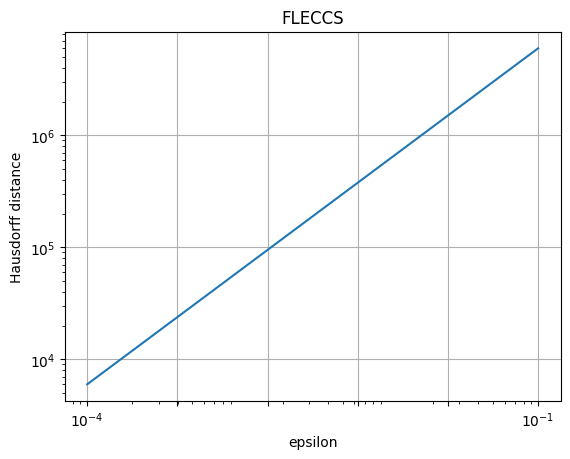

FLECCS executed


In [1]:
import ipywidgets as widgets
from IPython.display import display, clear_output
from pyomo.opt import SolverFactory, TerminationCondition
from src.analyses.value_function import ValueFunction
from src.analyses.convergence_analysis import HausdorffAnalyzer
import numpy as np
import matplotlib.pyplot as plt
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo
from scipy.optimize import curve_fit
def get_critical_width(alg,y_optimal,k=1,abs_epsilon=0.01):
    haus=HausdorffAnalyzer(alg)
    print(f"width: {abs_epsilon/k}")
    print(haus._gen_interval(y_optimal,abs_epsilon/k))
def linear_func(x, a, b):
        return a * x + b
def convergence_analysis(alg,fixed_pt,optimal_sol,start=-5,stop=0,steps=6,name="instance"):

    haus=HausdorffAnalyzer(alg)
    eps_list, distances=haus.analyze(y=fixed_pt, v=optimal_sol,
                    eps_min= start, eps_max = stop, steps= steps,
                    y_optimal= True)
    log_eps = np.log10(eps_list)
    log_distances = np.log10(distances)

    # Perform curve fitting
    params, _ = curve_fit(linear_func, log_eps, log_distances)
    print(f"Slope:{params[0]} intercept:{params[1]}")
    plt.loglog(eps_list, distances)
    plt.grid()
    plt.xticks(np.logspace(start, stop, steps))
    plt.xlabel("epsilon")
    plt.ylabel("Hausdorff distance")
    plt.title(name)
    plt.show()
from NSPLIB.src.instances.FLECCS.src.pyomo_model.model import const_model
fleccs_obj = -4.946928843629e+08  # Replace with actual value
fleccs_sol = {'x_sorbent_total': 0.7571021770410511,'x_air_adsorb_max': 0.7567643358197031} 
fleccs_y_bound = {'x_sorbent_total': [0.0, 1.0],"x_air_adsorb_max": [0.0, 1.0]}

n_day = 7
week_diff = 52
sto_m = const_model(n_day=n_day, week_diff=week_diff)
m = CaoZavalaModel.from_sto_m(sto_m)
m.build()
alg=CaoZavalaAlgo(m,solver="baron")
convergence_analysis(alg,fleccs_sol,fleccs_obj,
                    start=-4,stop=-1,steps=6,name="FLECCS")
plt.show()
print("FLECCS executed")